In [1]:
import numpy as np

In [2]:
np.random.seed(15)
data=np.random.randint(0,100,10000)

In [3]:
np.random.seed(10)
newdata1=np.random.choice(data,100)
newdata2=np.random.choice(data,100)
newdata3=np.random.choice(data,100)
newdata4=np.random.choice(data,100)
newdata5=np.random.choice(data,100)
newdata6=np.random.choice(data,100)
newdata7=np.random.choice(data,100)
newdata8=np.random.choice(data,100)
newdata9=np.random.choice(data,100)
newdata10=np.random.choice(data,100)


In [4]:
(newdata1.mean()+newdata2.mean()+newdata3.mean()+newdata4.mean()+
 newdata5.mean()+newdata6.mean()+newdata7.mean()+newdata8.mean()+newdata9.mean()+newdata10.mean())/10

49.446

In [5]:
newdata1.std()

28.14201662994321

In [6]:
data.mean()

49.5186

In [7]:
import seaborn as sns
tips=sns.load_dataset("tips")
df=tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [9]:
import researchpy as rp
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


* **_rp.summary_cont() takes int columns and it is giving us to mean std conf. interval and so on.._**

In [10]:
rp.summary_cont(df[["total_bill","tip","size"]])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,total_bill,244.0,19.7859,8.9024,0.5699,18.6633,20.9086
1,tip,244.0,2.9983,1.3836,0.0886,2.8238,3.1728
2,size,244.0,2.5697,0.9511,0.0609,2.4497,2.6896


In [11]:
rp.summary_cont(df["total_bill"].groupby(df["time"]))

,N,Mean,SD,SE,95% Conf.,Interval
time,,,,,,
Lunch,68,17.1687,7.7139,0.9354,15.3015,19.0358
Dinner,176,20.7972,9.1420,0.6891,19.4371,22.1572


In [12]:
rp.summary_cont(df["total_bill"].groupby(df["day"]))

,N,Mean,SD,SE,95% Conf.,Interval
day,,,,,,
Thur,62,17.6827,7.8862,1.0015,15.6800,19.6855
Fri,19,17.1516,8.3027,1.9048,13.1498,21.1533
Sat,87,20.4414,9.4804,1.0164,18.4208,22.4619
Sun,76,21.4100,8.8321,1.0131,19.3918,23.4282


* **_rp.summary_cat() takes categorical columns_**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [14]:
rp.summary_cat(df[["sex","smoker","day","time"]]).T

,0,1,2,3,4,5,6,7,8,9
Variable,sex,,smoker,,day,,,,time,
Outcome,Male,Female,No,Yes,Sat,Sun,Thur,Fri,Dinner,Lunch
Count,157,87,151,93,87,76,62,19,176,68
Percent,64.34,35.66,61.89,38.11,35.66,31.15,25.41,7.79,72.13,27.87


* **_finding covariance and correlation .cov(), .corr()_**

In [15]:
df[["tip","total_bill"]].cov()

,tip,total_bill
tip,1.914455,8.323502
total_bill,8.323502,79.252939


In [16]:
df[["tip","total_bill"]].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


* **_for finding %95 confidence interval sms.DescrStatsW().tconfint_mean()_**

In [17]:
import random
import numpy as np 
import math
import statsmodels.stats.api as sms
fiyatlar=np.random.randint(10,110,1000)
print(fiyatlar.mean())
print(fiyatlar.std())

sms.DescrStatsW(fiyatlar).tconfint_mean()

58.492
29.192874747102245


(56.67953887736034, 60.30446112263965)

* **_Bernoulli Distribution   from scipy.stats import bernoulli_**

In [18]:
from scipy.stats import bernoulli

In [19]:
p=0.6
result=bernoulli(p)
result.pmf(k=0)

0.4

In [20]:
import numpy as np 
rng=np.random.RandomState(123)
for i in np.arange(1,21):
    number=2**i
    heads_tails=rng.randint(0,2,size=number)
    ptails=np.mean(heads_tails)
    print("Number of tosses:",number,"---","Probability of Tails:%.2f"%(ptails*100),"%","---",
         "Probabilty of Heads:%.2f"%(100-ptails*100),"%")


Number of tosses: 2 --- Probability of Tails:50.00 % --- Probabilty of Heads:50.00 %
Number of tosses: 4 --- Probability of Tails:0.00 % --- Probabilty of Heads:100.00 %
Number of tosses: 8 --- Probability of Tails:62.50 % --- Probabilty of Heads:37.50 %
Number of tosses: 16 --- Probability of Tails:43.75 % --- Probabilty of Heads:56.25 %
Number of tosses: 32 --- Probability of Tails:46.88 % --- Probabilty of Heads:53.12 %
Number of tosses: 64 --- Probability of Tails:56.25 % --- Probabilty of Heads:43.75 %
Number of tosses: 128 --- Probability of Tails:50.78 % --- Probabilty of Heads:49.22 %
Number of tosses: 256 --- Probability of Tails:52.73 % --- Probabilty of Heads:47.27 %
Number of tosses: 512 --- Probability of Tails:52.93 % --- Probabilty of Heads:47.07 %
Number of tosses: 1024 --- Probability of Tails:50.20 % --- Probabilty of Heads:49.80 %
Number of tosses: 2048 --- Probability of Tails:48.58 % --- Probabilty of Heads:51.42 %
Number of tosses: 4096 --- Probability of Tails:49

In [21]:
from scipy.stats import binom
    

In [22]:
p=0.01
n=100
rv=binom(n,p)
print(rv.pmf(1))
print(rv.pmf(5))
print(rv.pmf(10))

0.36972963764971983
0.0028977871237616114
7.006035693977161e-08


In [23]:
from scipy.stats import poisson

In [24]:
r=poisson(mu=0.1)
print(r.pmf(0))
print(r.pmf(3))
print(r.pmf(5))

0.9048374180359595
0.00015080623633932676
7.54031181696634e-08


In [25]:
from scipy.stats import norm

* **_norm.cdf() takes value which will calculate mean and std it can think as calculating integral of a function_**

In [26]:
norm.cdf(80,80,5)

0.5

In [27]:
norm.cdf(70,80,5)

0.022750131948179195

In [28]:
norm.cdf(80,80,5)-norm.cdf(70,80,5)

0.4772498680518208

In [29]:
evaluations=np.array([17,160,234,149,145,107,197,75,201,225,211,119,157,
                     145,127,244,163,114,145,65,112,185,202,146,
                     203,224,203,114,188,156,187,154,177,95,165,50,110,
                     216,138,151,166,135,155,84,251,173,131,207,121,120])

In [30]:
evaluations[0:5]

array([ 17, 160, 234, 149, 145])

In [31]:
import scipy.stats as stats

In [32]:
stats.describe(evaluations)

DescribeResult(nobs=50, minmax=(17, 251), mean=154.38, variance=2578.0363265306123, skewness=-0.32398897278694483, kurtosis=-0.05849823498415985)

In [33]:
"import pandas as pd"
"evaluations=pd.DataFrame(evaluations)"
"evaluations.describe().T"

'evaluations.describe().T'

In [34]:
"evaluations.plot.hist();"

'evaluations.plot.hist();'

In [35]:
import pylab

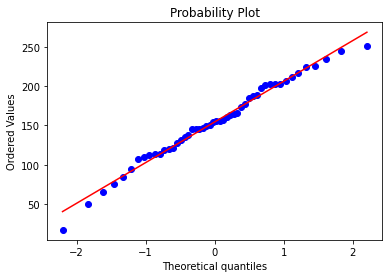

In [36]:
##qqplot
stats.probplot(evaluations,dist="norm",plot=pylab)
pylab.show()

In [37]:
from scipy.stats import shapiro

In [38]:
# gives test statistic value and p-value
shapiro(evaluations)

ShapiroResult(statistic=0.9853105545043945, pvalue=0.7848747968673706)

In [39]:
#verifying the H0 
stats.ttest_1samp(evaluations,popmean=170)

Ttest_1sampResult(statistic=-2.1753117985877966, pvalue=0.034460415195071446)

In [40]:
from statsmodels.stats.descriptivestats import sign_test

In [41]:
sign_test(evaluations,170)

(-7.0, 0.06490864707227219)

* **_One Sample Proportion Test_**

In [42]:
from statsmodels.stats.proportion import proportions_ztest as z

In [43]:
count=40
nobs=500
value=0.125
z(count,nobs,value)

(-3.7090151628513017, 0.0002080669689845979)

In [44]:
import pandas as pd

df=pd.DataFrame(np.random.randint(0,31,size=30))
df1=pd.DataFrame(np.random.randint(27,40,size=30))
df.head()

,0
0,25
1,20
2,0
3,17
4,1


In [45]:
groupA=np.arange(len(df))
groupA=pd.DataFrame(groupA)
groupA[:]="A"
A=pd.concat([df,groupA],axis=1)
A.columns=["numbers","group"]
A.head()

,numbers,group
0,25,A
1,20,A
2,0,A
3,17,A
4,1,A


In [46]:
groupb=np.arange(len(df1))
groupb=pd.DataFrame(groupb)
groupb[:]="B"
B=pd.concat([df1,groupb],axis=1)
B.columns=["numbers","group"]
B.head()

,numbers,group
0,39,B
1,27,B
2,39,B
3,36,B
4,35,B


In [47]:
AB=pd.concat([A,B])
print(AB.tail())
print(AB.head())
AB.max()

    numbers group
25       35     B
26       39     B
27       30     B
28       38     B
29       39     B
   numbers group
0       25     A
1       20     A
2        0     A
3       17     A
4        1     A


numbers    39
group       B
dtype: object

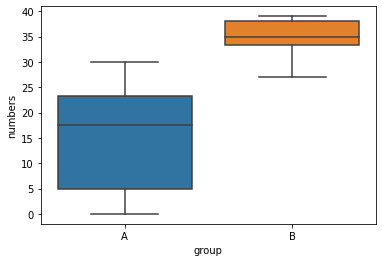

In [48]:
sns.boxplot(x="group",y="numbers",data=AB);


In [49]:
from scipy.stats import shapiro

In [50]:
A_B=pd.concat([df,df1],axis=1)
A_B.columns=["A","B"]
A_B.head()

,A,B
0,25,39
1,20,27
2,0,39
3,17,36
4,1,35


In [51]:
shapiro(A_B.A)

ShapiroResult(statistic=0.92423415184021, pvalue=0.03458728641271591)

In [52]:
shapiro(A_B.B)

ShapiroResult(statistic=0.9068061709403992, pvalue=0.012372350320219994)

* **_Homogenity of Variance Hyphotesis_**

In [53]:
from scipy.stats import levene

In [54]:
levene(A_B.A,A_B.B)

LeveneResult(statistic=25.677031093279826, pvalue=4.401865854302442e-06)

* **_Hypothesis test (AB Test)_**

In [55]:
stats.ttest_ind(A_B.A,A_B.B,equal_var=True)

Ttest_indResult(statistic=-10.938512506310333, pvalue=1.0061962092786381e-15)

In [56]:
stat,pvalue=stats.ttest_ind(A_B.A,A_B.B,equal_var=True)
print("Stat value= %.4f,pvalue=%.4f"%(stat,pvalue))

Stat value= -10.9385,pvalue=0.0000


* **_Nonparametric independent two sample test_**

In [57]:
stat,pvalue=stats.mannwhitneyu(A_B.A,A_B.B)
print("Stat value= %.4f,pvalue=%.4f"%(stat,pvalue))

Stat value= 6.0000,pvalue=0.0000


* **<font color='red'>_Dependent Two Sample T Test_</font>**

In [58]:
before=pd.DataFrame(np.random.randint(100,125,size=40))
after=pd.DataFrame(np.random.randint(100,140,size=40))

In [59]:
dsc=np.arange(len(after)+len(before))
dsc=pd.DataFrame(dsc)
dsc=pd.concat([before,after],axis=1)
dsc.columns=["A","B"]
################
df=np.arange(len(before))
df=pd.DataFrame(df)
df[:]="Before"
newdf=pd.concat([before,df],axis=1)
###################
df1=np.arange(len(after))
df1=pd.DataFrame(df1)
df1[:]="After"
newdf1=pd.concat([after,df1],axis=1)
###################
last=pd.concat([newdf,newdf1],axis=0)
last.columns=["numbers","Status"]
last.head()
################
dsc.head()

,A,B
0,105,120
1,108,127
2,104,118
3,117,114
4,106,134


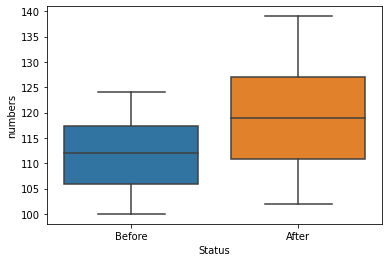

In [60]:
sns.boxplot(x="Status",y="numbers",data=last);

* **<font color='red'>_Normalization_</font>**

In [61]:
from scipy.stats import shapiro
shapiro(dsc.A)

ShapiroResult(statistic=0.9592298269271851, pvalue=0.1576334536075592)

In [62]:
shapiro(dsc.B)

ShapiroResult(statistic=0.9584046602249146, pvalue=0.14768801629543304)

* **<font color='red'>_Variance Homogenious_</font>**

In [94]:
from scipy import stats
stats.levene(dsc.A,dsc.B)

LeveneResult(statistic=6.293540616385625, pvalue=0.01419203171662163)

* **<font color='red'>_Applying Dependent Two Sample T Test_</font>**

In [95]:
stats.ttest_rel(dsc.A,dsc.B)

Ttest_relResult(statistic=-3.6059364839346895, pvalue=0.0008716056240443122)

* **_Assume that our normalization and variance homogenious tests are not valid,so in this situation, we use nonparametric dependent two sample ratio test <font color='red'>(wilcoxon)</font> which is inside stats library_**

In [68]:
stats.wilcoxon(dsc.A,dsc.B)

WilcoxonResult(statistic=175.0, pvalue=0.0015752346443270355)

* **<font color='red'>_Two Sample Ratio Test (AB Test)_</font>**

In [73]:
from statsmodels.stats.proportion import proportions_ztest

In [74]:
obs=np.array([1000,1100])
scnt=np.array([300,250])
proportions_ztest(count=scnt,nobs=obs)

(3.7857863233209255, 0.0001532232957772221)

In [80]:
A=pd.DataFrame(np.random.randint(27,34,size=30))
B=pd.DataFrame(np.random.randint(27,34,size=30))
C=pd.DataFrame(np.random.randint(27,34,size=30))
dfs=[A,B,C]
df=pd.concat(dfs,axis=1)
df.columns=["a","b","c"]
df.head()

,a,b,c
0,29,27,30
1,30,29,28
2,27,32,30
3,32,30,31
4,27,28,27


* **<font color='red'>_Variance Analysis_</font>**
* Step1: <font color='green'>_Normalization Test (Shapiro)_</font>
* Step2: <font color='green'>_Variance Homogenious Test (Levene)_</font>
* Step3:<font color='green'>_Hypothesis test (Variance Analysis)_</font>

In [81]:
from scipy.stats import shapiro

In [86]:
print(shapiro(df.a))
print(shapiro(df.b))
print(shapiro(df.c))

ShapiroResult(statistic=0.8567851781845093, pvalue=0.0008628256618976593)
ShapiroResult(statistic=0.9396389126777649, pvalue=0.08894483745098114)
ShapiroResult(statistic=0.9383663535118103, pvalue=0.08220075070858002)


In [87]:
from scipy.stats import levene
print(levene(df.a,df.b,df.c))

LeveneResult(statistic=4.772869429241595, pvalue=0.010794367037905048)


* **<font color='red'>_Hypothesis Test for Variance Analysis (f_oneway)_</font>**

In [88]:
from scipy.stats import f_oneway

In [89]:
f_oneway(df.a,df.b,df.c)

F_onewayResult(statistic=0.3839339040414096, pvalue=0.6823247954850492)

In [91]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
a,30.0,29.900000,2.368617,27.0,27.25,30.0,32.0,33.0
b,30.0,29.933333,1.700575,27.0,29.00,30.0,31.0,33.0
c,30.0,30.300000,1.744943,27.0,29.00,30.0,32.0,33.0


* **<font color='red'>_Nonparametric Hypothesis Test for Variance Analysis (kruskal)_</font>**

In [96]:
from scipy.stats import kruskal

In [97]:
kruskal(df.a,df.b,df.c)

KruskalResult(statistic=0.7050325955486035, pvalue=0.7029171137328917)

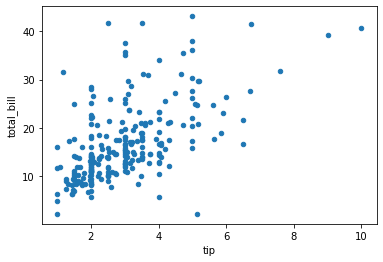

In [160]:
import seaborn as sns
df=sns.load_dataset("tips")
data=df.copy()
df["total_bill"]=df["total_bill"]-df["tip"]
df.head()
df.plot.scatter("tip","total_bill") ;

In [161]:
from scipy.stats import shapiro
test,p=shapiro(df["total_bill"])
print("Test statistics:%.4f P-Value:%.4f"%(test,p))

Test statistics:0.9136 P-Value:0.0000


In [162]:
test,p=shapiro(df["tip"])
print("Test statistics:%.4f P-Value:%.4f"%(test,p))

Test statistics:0.8978 P-Value:0.0000


* **<font color='red'>_Finding correlation value .(corr)_</font>**

In [167]:
print(df["tip"].corr(df["total_bill"]))##For Parametric
print(df["tip"].corr(df["total_bill"],method="spearman"))##For Non-parametric

0.5766634471096382
0.593691939408997


In [166]:
from scipy.stats import pearsonr

In [169]:
test,p=pearsonr(df["tip"],df["total_bill"])
print("Test:%.3f  Pvalue:%.3f" %(test,p))

Test:0.577  Pvalue:0.000


In [175]:
from scipy.stats import spearmanr

In [176]:
test,p=spearmanr(df["tip"],df["total_bill"])
print("Test:%.3f  Pvalue:%.3f" %(test,p))

Test:0.594  Pvalue:0.000


* **<font color='red'>_Another evalutaion method ,if need, kendalltau()_</font>**

In [177]:
from scipy.stats import kendalltau

In [178]:
test,p=kendalltau(df["tip"],df["total_bill"])
print("Test:%.3f  Pvalue:%.3f" %(test,p))

Test:0.440  Pvalue:0.000
